<a href="https://colab.research.google.com/github/JoybirSingh/NLP-MINI-PROJECTS/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
data = pd.read_csv("/content/emails.csv")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,7.289017,6.771098,5.916763,3.159538,3.492486,2.707514,61.804624,2.828902,2.346821,11.363006,...,0.016204,0.008102,0.010417,0.096065,0.008102,0.001157,0.012731,0.981481,0.006944,0.283565
std,13.420106,10.811874,14.230168,6.501779,5.100404,6.342738,110.616852,4.847761,7.170376,20.264227,...,0.197825,0.122466,0.112417,0.499161,0.122466,0.034021,0.139773,4.297686,0.083092,0.450989
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,8.000000,5.000000,3.000000,4.000000,2.000000,62.000000,3.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,188.000000,83.000000,39.000000,77.000000,1898.000000,42.000000,92.000000,223.000000,...,4.000000,3.000000,2.000000,6.000000,3.000000,1.000000,3.000000,114.000000,1.000000,1.000000


In [21]:
data.info

<bound method DataFrame.info of      the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
0      0   0    1    0    0   0    2    0    0   0  ...       0.0  0.0   
1      8  13   24    6    6   2  102    1   27  18  ...       0.0  0.0   
2      0   0    1    0    0   0    8    0    0   4  ...       0.0  0.0   
3      0   5   22    0    5   1   51    2   10   1  ...       0.0  0.0   
4      7   6   17    1    5   2   57    0    9   3  ...       0.0  0.0   
..   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
860    3   0    1    1    0   1   11    0    0   2  ...       0.0  0.0   
861    0   1    1    0    0   1    0    0    0   0  ...       0.0  0.0   
862   51  48  112   16   20  12  442    8   54  63  ...       0.0  0.0   
863    1   6    8    1    1   0   41    3    2   6  ...       4.0  0.0   
864    1   2    1    1    0   0   10    3    0   5  ...       NaN  NaN   

     valued  lay  infrastructure  military  allowing   ff  dry  Prediction  
0       0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
1       0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
2       0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
3       0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
4       0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
..      ...  ...             ...       ...       ...  ...  ...         ...  
860     0.0  0.0             0.0       0.0       0.0  0.0  0.0         1.0  
861     0.0  0.0             0.0       0.0       0.0  0.0  0.0         1.0  
862     0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
863     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
864     NaN  NaN             NaN       NaN       NaN  NaN  NaN         NaN  

[865 rows x 3001 columns]>

In [22]:
data.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3001, dtype: int64

In [25]:
data.sample(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
487,6,4,1,0,2,1,33,1,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
784,20,8,22,5,3,0,115,6,10,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,31,22,60,8,8,14,217,5,27,47,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0
666,3,2,1,2,0,2,27,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
478,5,2,1,3,5,2,31,2,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.min()
data.max()
data.mean()
data.var()

the           180.099243
to            116.896617
ect           202.497693
and            42.273129
for            26.014122
                 ...    
military        0.001157
allowing        0.019536
ff             18.470109
dry             0.006904
Prediction      0.203391
Length: 3001, dtype: float64

Text(0.5, 1.0, 'Number of Spam and not')

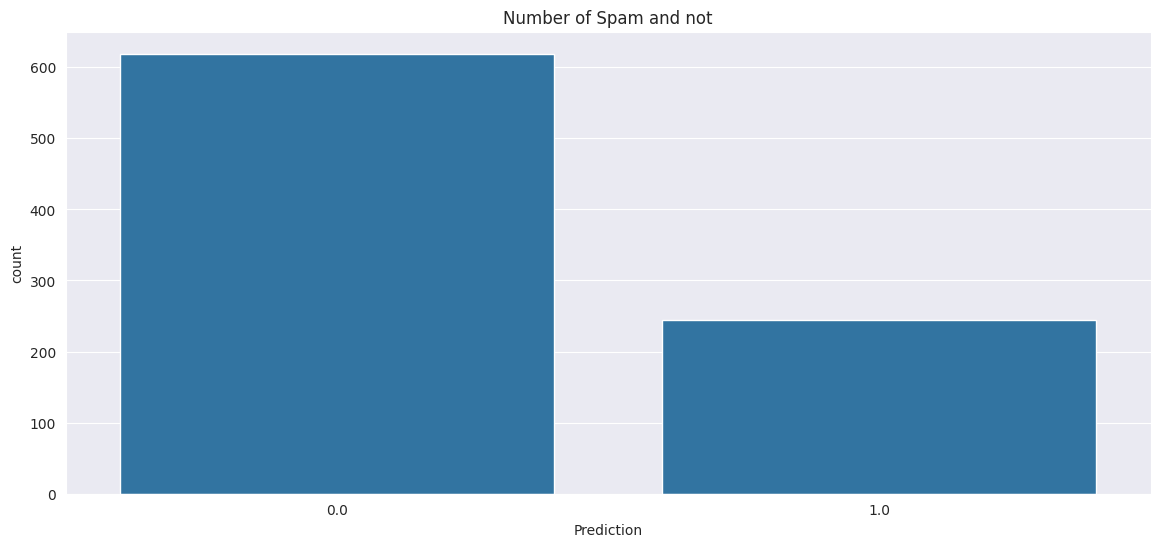

In [13]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=data)
plt.title('Number of Spam and not')

In [14]:
#skewness and kurtosis
spam_skewness = skew(data['Prediction'])
spam_kurtosis = kurtosis(data['Prediction'])
print(f"Skewness of 'Prediction' column: {spam_skewness}")
print(f"Kurtosis of 'Prediction' column: {spam_kurtosis}")

Skewness of 'Prediction' column: nan
Kurtosis of 'Prediction' column: nan


Skewness of 'in' column: 4.651984154537811
Kurtosis of 'in' column: 30.169748324058965


<ipython-input-15-0bb90a4609b5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['in'])


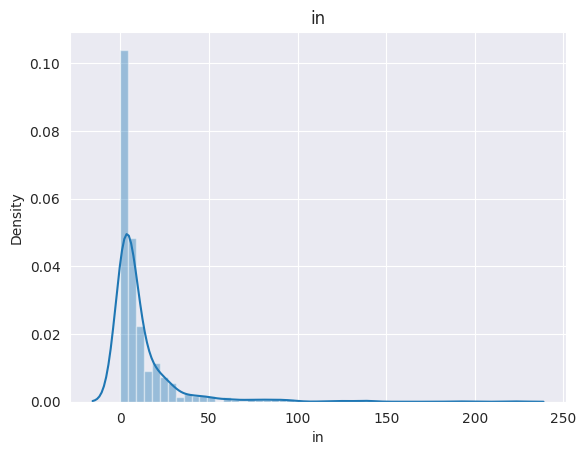

In [15]:
#distribution plot
spam_skewness = skew(data['in'])
spam_kurtosis = kurtosis(data['in'])
print(f"Skewness of 'in' column: {spam_skewness}")
print(f"Kurtosis of 'in' column: {spam_kurtosis}")
sns.distplot(data['in'])
plt.title('in')
plt.show()

Skewness of 'out' column: 8.118680743811133
Kurtosis of 'out' column: 111.49763309014179


<ipython-input-16-9dd6a25d376d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['out'])


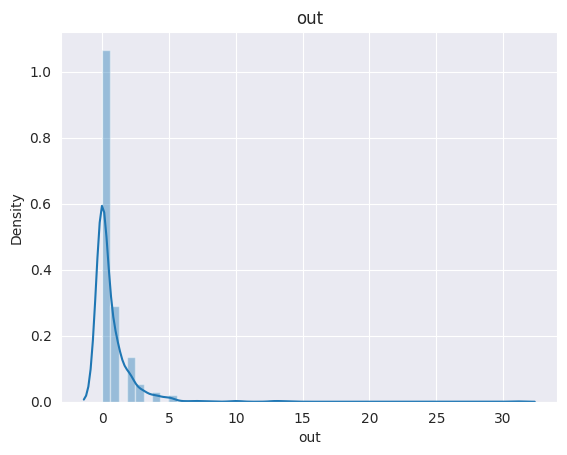

In [16]:
#distribution plot
spam_skewness = skew(data['out'])
spam_kurtosis = kurtosis(data['out'])
print(f"Skewness of 'out' column: {spam_skewness}")
print(f"Kurtosis of 'out' column: {spam_kurtosis}")
sns.distplot(data['out'])
plt.title('out')
plt.show()

In [17]:
#correlation
target_column = 'Prediction'
numeric_features = data.select_dtypes(include=[np.number])
cov_matrix = numeric_features.cov()
cov_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,180.099243,117.344011,67.985890,73.395967,54.048471,71.200372,1037.598199,34.197656,32.303582,223.768806,...,0.007940,-0.000086,0.248358,1.932106,0.373031,0.106262,0.421484,14.689155,0.076735,-0.219690
to,117.344011,116.896617,62.450832,56.512255,44.122121,52.893620,1081.606847,26.394818,31.166285,194.533420,...,0.027957,0.022669,0.161078,1.812909,0.329738,0.094117,0.321503,13.619265,0.146397,0.291689
ect,67.985890,62.450832,202.497693,22.108202,35.433402,17.405024,610.810108,16.087594,99.907374,95.510575,...,0.416090,0.299586,0.010079,1.229938,0.019169,0.008201,0.018370,4.735526,0.021397,-1.010430
and,73.395967,56.512255,22.108202,42.273129,23.990784,34.633522,543.234910,14.454412,10.589281,115.966325,...,-0.007264,0.003321,0.113026,1.037718,0.261722,0.076290,0.244748,8.727222,0.032477,0.312052
for,54.048471,44.122121,35.433402,23.990784,26.014122,23.600230,404.826655,12.521861,16.731776,81.890462,...,0.025549,0.020306,0.114173,0.805085,0.154721,0.041140,0.166325,5.280353,0.030152,-0.063325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.106262,0.094117,0.008201,0.076290,0.041140,0.062908,0.905140,0.004833,0.001912,0.245226,...,-0.000019,-0.000009,-0.000012,0.001047,0.003467,0.001157,0.003461,0.034784,-0.000008,0.000830
allowing,0.421484,0.321503,0.018370,0.244748,0.166325,0.237755,2.971599,0.104153,0.003656,0.842324,...,-0.000207,-0.000103,-0.000133,0.002252,0.010325,0.003461,0.019536,0.106841,-0.000089,0.001021
ff,14.689155,13.619265,4.735526,8.727222,5.280353,8.707266,160.371765,3.025793,1.931162,30.704433,...,-0.008970,0.021008,0.017574,0.281039,0.117184,0.034784,0.106841,18.470109,0.018669,0.269452
dry,0.076735,0.146397,0.021397,0.032477,0.030152,0.049520,1.150420,0.019731,0.002205,0.289430,...,-0.000113,-0.000056,-0.000072,0.002808,-0.000056,-0.000008,-0.000089,0.018669,0.006904,0.001505


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('Prediction', axis=1)
y = data['Prediction']

X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

data_pca = pd.DataFrame(X_pca, columns=['PCA_Component1', 'PCA_Component2'])
data_pca['Prediction'] = y
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [ ]:
X = data.drop("Prediction",axis=1)
y= data["Prediction"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [ ]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print(f"Naive Bayesian Accuracy: {accuracy_score(y_test, nb_predictions)}")

Naive Bayesian Accuracy: 0.9478260869565217


In [ ]:
predictions= nb_classifier.predict(X_test)
predictions[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
print('Naive Bayesian Confusion Matrix:\n', conf_matrix_nb)
print('Naive Bayesian Classification Report:\n', classification_report(y_test, nb_predictions))

Naive Bayesian Confusion Matrix:
 [[697  42]
 [ 12 284]]
Naive Bayesian Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



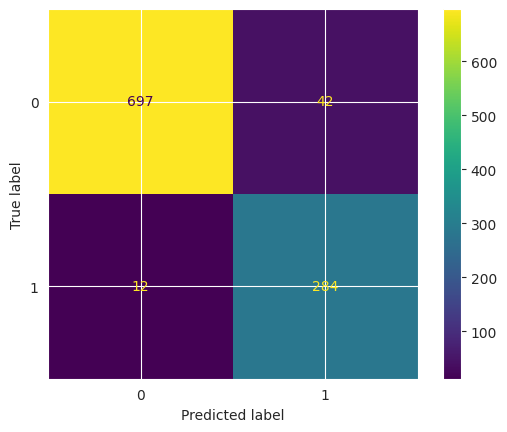

In [ ]:
#draw confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions)
plt.show()